In [1]:
import numpy as np
import pandas as pd
import os as os

## Loading the dataset and selecting the features

### Import the 4 final datasets from the preparation code

In [2]:
os.chdir('D:/finance and analytics/Online Courses/Udemy_Credit Risk Modelling_Python/Clean_Data')

In [3]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)

In [4]:
loan_data_inputs_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


### Explore Data

In [5]:
print(loan_data_inputs_train.shape)
print(loan_data_targets_train.shape)
print(loan_data_inputs_test.shape)
print(loan_data_targets_test.shape)

(373028, 324)
(373028, 1)
(93257, 324)
(93257, 1)


### Selecting the features

#### Selecting only the relevant features will all their dummy variables

In [6]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

#### Removing the benchmark dummy category from each variable to prevent from the "Dummy Variable Trap"

Dummy Variable Trap: If all dummy categories of a variable are used, then one category can be expressed in form of all other categories of that variable. This creates high mutlicollinearity problem. Thus, removing one category from that variable will resolve the issue

In [7]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

Dropping the reference categories from each variable. Reference category can be any one dummy category for that variable.

In [8]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


## PD Model Estimation

### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [10]:
reg = LogisticRegression(max_iter = 300)

In [11]:
pd.options.display.max_rows = None

#### reg will be the object containing the logistic regression model. 

In [12]:
reg.fit(inputs_train, loan_data_targets_train)

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=300)

In [13]:
reg.intercept_

array([-1.83915769])

In [14]:
reg.coef_

array([[ 1.13835761,  0.89481636,  0.69886104,  0.50959144,  0.33153108,
         0.14231424,  0.09144056,  0.10695429,  0.03791293,  0.05981004,
         0.06071547,  0.06334707,  0.07941848,  0.13748936,  0.10138436,
         0.18600231,  0.24069178,  0.22528967,  0.26419014,  0.32198242,
         0.52334153,  0.08708341, -0.01068398,  0.30484789,  0.2014332 ,
         0.21469783,  0.2677126 ,  0.05410106,  0.07941824,  0.10082025,
         0.12624084,  0.09132963,  0.06111905,  0.12384182,  1.07972439,
         0.87934883,  0.77919558,  0.57756016,  0.41515423,  0.16966171,
        -0.06590682,  0.86874556,  0.54713127,  0.29779093,  0.10798484,
         0.05713137,  0.03895247,  0.08024149,  0.12086409,  0.12651741,
         0.0904264 ,  0.0534228 ,  0.70436046,  0.56053673,  0.35086525,
         0.48411273,  0.38864296,  0.36245861,  0.34585541,  0.34406524,
         0.37346009,  0.28299769,  0.12710703,  0.15629494, -0.02001716,
         0.02729648,  0.23047555,  0.04313196,  0.0

In [15]:
feature_name = inputs_train.columns.values

In [16]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
#adding the intercept in the first row by creating an extra index
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.839158
1,grade:A,1.138358
2,grade:B,0.894816
3,grade:C,0.698861
4,grade:D,0.509591
5,grade:E,0.331531
6,grade:F,0.142314
7,home_ownership:OWN,0.091441
8,home_ownership:MORTGAGE,0.106954
9,addr_state:NM_VA,0.037913


## Building a regression model with p-values

#### Sklearn logistic regression does not have an inbuilt p-value. Hence, we have written an external function to calculate the p-values and add it to the model summary

In [17]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
#loading the original logistic regression from sklearn 
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)
#calculating p-vlaues for each variable interdependent on each other using linear algebra
    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [18]:
reg = LogisticRegression_with_p_values(max_iter = 1000)
reg.fit(inputs_train, loan_data_targets_train)

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
#Adding the p-values to the summary dataframe
p_values = reg.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.839158,NaN
1,grade:A,1.138358,4.598271e-36
2,grade:B,0.894816,1.441495e-48
3,grade:C,0.698861,5.760851e-35
4,grade:D,0.509591,2.701079e-21
5,grade:E,0.331531,5.399407e-12
6,grade:F,0.142314,4.528588e-03
7,home_ownership:OWN,0.091441,5.872424e-06
8,home_ownership:MORTGAGE,0.106954,3.751091e-17
9,addr_state:NM_VA,0.037913,2.371174e-01


### Calculate the p-values for every coefficient. 

#### Case I -  If all dummy categories of a variable have non-significant values, remove that variable. 

#### Case II -  If all categories of a dummy variable are significant, keep that variable.

####  Case III -  If only partial dummy categories of a variable are significant, keep all dummy categories of that variable as removing few dummy categories of that variable will make the variable incomplete.

#### On evaluating the above p-values of dummy categories for different variable, the following variables were removed - delinq_2yrs, open_acc, pub_rec, total_rev_hi_lim, total_acc. Thus, variables list and reference category list were changed accordingly and new dataset after removing this variables was selected

In [20]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [21]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [22]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


#### The logistic regression model is re-run again with the new dataset (insignificant variables removed)

In [23]:
reg2 = LogisticRegression_with_p_values(max_iter = 1000)
reg2.fit(inputs_train, loan_data_targets_train)

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
feature_name = inputs_train.columns.values

In [25]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.365732,NaN
1,grade:A,1.125948,2.269581e-35
2,grade:B,0.884811,7.953248e-48
3,grade:C,0.690226,1.704891e-34
4,grade:D,0.502131,4.751338e-21
5,grade:E,0.326128,4.802112e-12
6,grade:F,0.137702,4.978830e-03
7,home_ownership:OWN,0.093502,3.459712e-06
8,home_ownership:MORTGAGE,0.106268,4.349140e-17
9,addr_state:NM_VA,0.038231,2.325657e-01


#### Dumping the logistic regression model

In [26]:
import pickle

In [27]:
os.chdir('D:/finance and analytics/Online Courses/Udemy_Credit Risk Modelling_Python')

In [28]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))

# PD Model Validation test

## Out of sample validation test

#### Selecting the same variables in the test dataset as the train dataset

In [29]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [30]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [31]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


##### The below line will predict output with 0.5 as the threshold

In [32]:
y_hat_test = reg2.model.predict(inputs_test)
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

##### Instead of predicting the output, the below line with give us probabilities of default, and prob of not default

In [33]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)
y_hat_test_proba

array([[0.07567508, 0.92432492],
       [0.15450295, 0.84549705],
       [0.11438654, 0.88561346],
       ...,
       [0.02674982, 0.97325018],
       [0.04018484, 0.95981516],
       [0.04764502, 0.95235498]])

##### Removing the first column as both column sum is always 1.

In [34]:
y_hat_test_proba = y_hat_test_proba[:][: , 1]
y_hat_test_proba

array([0.92432492, 0.84549705, 0.88561346, ..., 0.97325018, 0.95981516,
       0.95235498])

##### Combining the probabilities with actual test dataset output, so that comparison analysis can be done

In [35]:
#copying test dataset target to a temporary df
loan_data_targets_test_temp = loan_data_targets_test
#dropping the index
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
#cbind with y_hat_test_proba
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [36]:
df_actual_predicted_probs.shape

(93257, 2)

In [37]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']
df_actual_predicted_probs.index = loan_data_inputs_test.index
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.924325
288564,1,0.845497
213591,1,0.885613
263083,1,0.940656
165001,1,0.968726


## Area under the curve

#### Setting the threshold (tr) and converting predicted probability into predicted outputs

In [38]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [39]:
conf_mat = pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted'])
conf_mat

Predicted,0,1
Actual,,
0,7379,2811
1,35808,47259


In [40]:
accuracy = (conf_mat.iloc[0,0] + conf_mat.iloc[1,1])/df_actual_predicted_probs.shape[0]
accuracy

0.5858863141640842

### RoC curve and RoC_AuC score

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score

#### roc_curve function returns three things - FPR and TPR at different threshold

In [42]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99990186, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.20384750e-04, ...,
        9.99987962e-01, 9.99987962e-01, 1.00000000e+00]),
 array([1.99267439, 0.99267439, 0.99074653, ..., 0.40480723, 0.38172547,
        0.38038407]))

In [43]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                                 df_actual_predicted_probs['y_hat_test_proba'])

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Plotting the ROC curve

Text(0.5, 1.0, 'ROC curve')

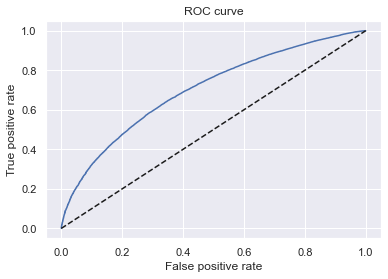

In [45]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

#### Calculating the AuRoC

In [46]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.7021492984020501

### Gini and Kolmogorov-Smirnov

#### Sorting on basis of default probability. People with higher chances of default first

In [47]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [48]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
42341,1,0.380384,0
39810,0,0.381725,0
42344,1,0.404807,0
40518,0,0.437310,0
40173,0,0.458525,0


In [49]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
262480,1,0.991258,1
231463,1,0.991303,1
239228,1,0.991672,1
261086,1,0.992078,1
242624,1,0.992674,1


In [50]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [51]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,42341,1,0.380384,0
1,39810,0,0.381725,0
2,42344,1,0.404807,0
3,40518,0,0.437310,0
4,40173,0,0.458525,0


#### Calculating cummulative population, then cumulative good population and cummulative bad population

In [55]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [56]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,42341,1,0.380384,0,1,1,0
1,39810,0,0.381725,0,2,1,1
2,42344,1,0.404807,0,3,2,1
3,40518,0,0.437310,0,4,2,2
4,40173,0,0.458525,0,5,2,3


#### Cummulative percentage calculation

In [57]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

In [58]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42341,1,0.380384,0,1,1,0,0.000011,0.000012,0.000000
1,39810,0,0.381725,0,2,1,1,0.000021,0.000012,0.000098
2,42344,1,0.404807,0,3,2,1,0.000032,0.000024,0.000098
3,40518,0,0.437310,0,4,2,2,0.000043,0.000024,0.000196
4,40173,0,0.458525,0,5,2,3,0.000054,0.000024,0.000294


In [59]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
93252,262480,1,0.991258,1,93253,83063,10190,0.999957,0.999952,1.0
93253,231463,1,0.991303,1,93254,83064,10190,0.999968,0.999964,1.0
93254,239228,1,0.991672,1,93255,83065,10190,0.999979,0.999976,1.0
93255,261086,1,0.992078,1,93256,83066,10190,0.999989,0.999988,1.0
93256,242624,1,0.992674,1,93257,83067,10190,1.000000,1.000000,1.0


#### The gini graph tells us if the bad population is evenly distributed or there is a very high concentration of bad population
#### in the beginning (lower prob value, thus higher chance of defaulter first). Higher the area is, that means, all the worst off people
#### are the defaulters and there is rarely any defualter post middle class ( post 50% population percentage.)

Text(0.5, 1.0, 'Gini')

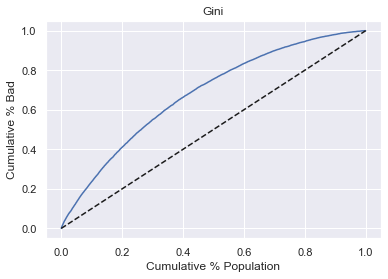

In [60]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [61]:
Gini = AUROC * 2 - 1
Gini

0.4042985968041002

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

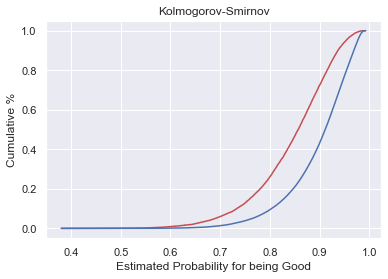

In [62]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [63]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.29641453575322513

# Applying the PD Model

### Calculating PD of individual accounts

In [64]:
pd.options.display.max_columns = None

In [65]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [66]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.365732,NaN
1,grade:A,1.125948,2.269581e-35
2,grade:B,0.884811,7.953248e-48
3,grade:C,0.690226,1.704891e-34
4,grade:D,0.502131,4.751338e-21
5,grade:E,0.326128,4.802112e-12
6,grade:F,0.137702,4.978830e-03
7,home_ownership:OWN,0.093502,3.459712e-06
8,home_ownership:MORTGAGE,0.106268,4.349140e-17
9,addr_state:NM_VA,0.038231,2.325657e-01


#### To calculate the y_hat_test_proba, Beta of every coefficeint is multiplied with the value of independent variable. Note that beta of reference categories is 0. Also, sum(Beta*x) = z

#### As we know ln[p(y=1)/py=0)] = z

#### p(y=1)/p(y=0) = e^z

#### p(y=1) = 1 - P.D

#### (1-P.D)/P.D = e^z

#### Calculate P.D from above. 

#### y_hat_test_proba gives the value of p(y=1), thus 1 - P.D. Thus this gives the probability that the borrower will not default.

In [67]:
y_hat_test_proba

array([0.92432492, 0.84549705, 0.88561346, ..., 0.97325018, 0.95981516,
       0.95235498])

### Creating a Scorecard

In [68]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.365732,NaN
1,grade:A,1.125948,2.269581e-35
2,grade:B,0.884811,7.953248e-48
3,grade:C,0.690226,1.704891e-34
4,grade:D,0.502131,4.751338e-21
5,grade:E,0.326128,4.802112e-12
6,grade:F,0.137702,4.978830e-03
7,home_ownership:OWN,0.093502,3.459712e-06
8,home_ownership:MORTGAGE,0.106268,4.349140e-17
9,addr_state:NM_VA,0.038231,2.325657e-01


In [69]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

#### Making a dataframe with feature_name as reference categories, putting 0 as the coefficient value as beta of reference categories are zero. Also putting the p_values as nan.

In [70]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


#### Adding the reference categories dataframe into the main summary dataframe (which contains all the independent variables (beta) coefficient value along with the p-value.

In [71]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-1.365732,NaN
1,1,grade:A,1.125948,2.269581e-35
2,2,grade:B,0.884811,7.953248e-48
3,3,grade:C,0.690226,1.704891e-34
4,4,grade:D,0.502131,4.751338e-21
5,5,grade:E,0.326128,4.802112e-12
6,6,grade:F,0.137702,4.978830e-03
7,7,home_ownership:OWN,0.093502,3.459712e-06
8,8,home_ownership:MORTGAGE,0.106268,4.349140e-17
9,9,addr_state:NM_VA,0.038231,2.325657e-01


#### The line below will help to extract just the name of the feature before the colon

In [80]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]

In [82]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.365732,NaN,Intercept
1,1,grade:A,1.125948,2.269581e-35,grade
2,2,grade:B,0.884811,7.953248e-48,grade
3,3,grade:C,0.690226,1.704891e-34,grade
4,4,grade:D,0.502131,4.751338e-21,grade
5,5,grade:E,0.326128,4.802112e-12,grade
6,6,grade:F,0.137702,4.978830e-03,grade
7,7,home_ownership:OWN,0.093502,3.459712e-06,home_ownership
8,8,home_ownership:MORTGAGE,0.106268,4.349140e-17,home_ownership
9,9,addr_state:NM_VA,0.038231,2.325657e-01,addr_state


In [95]:
min_score = 300
max_score = 850

#### The line below will give us the lowest coefficient for every feature. Most of them is zero as the beta coefficient of reference category is 0.

In [96]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                     -1.365732
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.073212
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.068984
mths_since_last_delinq         0.000000
mths_since_last_record         0.000000
purpose                        0.000000
term                           0.000000
verification_status           -0.010922
Name: Coefficients, dtype: float64

#### Summing all the minimum coefficients will give us the minimum z value possible. We will equate this to the minimum score which is 300.

In [85]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-1.5188495604948204

#### The line below will give us the maximum coefficient for every feature

In [97]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept                     -1.365732
acc_now_delinq                 0.220868
addr_state                     0.522779
annual_inc                     0.566844
dti                            0.387286
emp_length                     0.125940
grade                          1.125948
home_ownership                 0.106268
initial_list_status            0.054491
inq_last_6mths                 0.707274
int_rate                       0.884840
mths_since_earliest_cr_line    0.128732
mths_since_issue_d             1.083768
mths_since_last_delinq         0.215261
mths_since_last_record         0.403244
purpose                        0.302139
term                           0.079041
verification_status            0.084951
Name: Coefficients, dtype: float64

#### Summing all the maximum coefficients will give us the maximum z value possible. We will equate this to the maximum score which is 850.

In [98]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

5.633943145548978

#### The line below will rescale each feature coefficient to a correspoding score

In [99]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.365732,NaN,Intercept,-105.015304
1,1,grade:A,1.125948,2.269581e-35,grade,86.577588
2,2,grade:B,0.884811,7.953248e-48,grade,68.035833
3,3,grade:C,0.690226,1.704891e-34,grade,53.073596
4,4,grade:D,0.502131,4.751338e-21,grade,38.610417
5,5,grade:E,0.326128,4.802112e-12,grade,25.077001
6,6,grade:F,0.137702,4.978830e-03,grade,10.588320
7,7,home_ownership:OWN,0.093502,3.459712e-06,home_ownership,7.189686
8,8,home_ownership:MORTGAGE,0.106268,4.349140e-17,home_ownership,8.171282
9,9,addr_state:NM_VA,0.038231,2.325657e-01,addr_state,2.939725


#### The incercept term should provide the default score as it will always be used in calculating the score, unlike other variables which have different categories. Thus, It is scaled and min_score of 300 is added to it

In [100]:
df_scorecard.groupby('Original feature name')['Score - Calculation'].min().sum() - df_scorecard['Score - Calculation'][0]

-11.773660848837565

In [101]:
df_scorecard['Coefficients'][0]/(max_sum_coef - min_sum_coef) * (max_score - min_score)

-105.01530432923929

In [102]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

C:\Users\ankit\AppData\Local\Temp\ipykernel_15940\1263832758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.365732,NaN,Intercept,311.773661
1,1,grade:A,1.125948,2.269581e-35,grade,86.577588
2,2,grade:B,0.884811,7.953248e-48,grade,68.035833
3,3,grade:C,0.690226,1.704891e-34,grade,53.073596
4,4,grade:D,0.502131,4.751338e-21,grade,38.610417
5,5,grade:E,0.326128,4.802112e-12,grade,25.077001
6,6,grade:F,0.137702,4.978830e-03,grade,10.588320
7,7,home_ownership:OWN,0.093502,3.459712e-06,home_ownership,7.189686
8,8,home_ownership:MORTGAGE,0.106268,4.349140e-17,home_ownership,8.171282
9,9,addr_state:NM_VA,0.038231,2.325657e-01,addr_state,2.939725


In [103]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-1.365732,NaN,Intercept,311.773661,312.0
1,1,grade:A,1.125948,2.269581e-35,grade,86.577588,87.0
2,2,grade:B,0.884811,7.953248e-48,grade,68.035833,68.0
3,3,grade:C,0.690226,1.704891e-34,grade,53.073596,53.0
4,4,grade:D,0.502131,4.751338e-21,grade,38.610417,39.0
5,5,grade:E,0.326128,4.802112e-12,grade,25.077001,25.0
6,6,grade:F,0.137702,4.978830e-03,grade,10.588320,11.0
7,7,home_ownership:OWN,0.093502,3.459712e-06,home_ownership,7.189686,7.0
8,8,home_ownership:MORTGAGE,0.106268,4.349140e-17,home_ownership,8.171282,8.0
9,9,addr_state:NM_VA,0.038231,2.325657e-01,addr_state,2.939725,3.0


#### Minimum score is calculated using the same group by methodology. taking the minimum score from each category and summing them

In [121]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

300.0

In [122]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel

851.0

#### We need to reduce the maximum score by 1 to make it 850. Thus, reducing the value of maxm category by 1 of any one feature will do. To find this, we find which variable was maxm rounded.

In [104]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,-1.365732,NaN,Intercept,311.773661,312.0,0.226339
1,1,grade:A,1.125948,2.269581e-35,grade,86.577588,87.0,0.422412
2,2,grade:B,0.884811,7.953248e-48,grade,68.035833,68.0,-0.035833
3,3,grade:C,0.690226,1.704891e-34,grade,53.073596,53.0,-0.073596
4,4,grade:D,0.502131,4.751338e-21,grade,38.610417,39.0,0.389583
5,5,grade:E,0.326128,4.802112e-12,grade,25.077001,25.0,-0.077001
6,6,grade:F,0.137702,4.978830e-03,grade,10.588320,11.0,0.411680
7,7,home_ownership:OWN,0.093502,3.459712e-06,home_ownership,7.189686,7.0,-0.189686
8,8,home_ownership:MORTGAGE,0.106268,4.349140e-17,home_ownership,8.171282,8.0,-0.171282
9,9,addr_state:NM_VA,0.038231,2.325657e-01,addr_state,2.939725,3.0,0.060275


In [105]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
#index 77 is a maxm category of variable mths_since_last_delinq and it was rounded off by most. Thus, its final value is reduced
#from 17 to 16.
df_scorecard['Score - Final'][77] = 16
df_scorecard

C:\Users\ankit\AppData\Local\Temp\ipykernel_15940\3029388669.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][77] = 16


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.365732,NaN,Intercept,311.773661,312.0,0.226339,312.0
1,1,grade:A,1.125948,2.269581e-35,grade,86.577588,87.0,0.422412,87.0
2,2,grade:B,0.884811,7.953248e-48,grade,68.035833,68.0,-0.035833,68.0
3,3,grade:C,0.690226,1.704891e-34,grade,53.073596,53.0,-0.073596,53.0
4,4,grade:D,0.502131,4.751338e-21,grade,38.610417,39.0,0.389583,39.0
5,5,grade:E,0.326128,4.802112e-12,grade,25.077001,25.0,-0.077001,25.0
6,6,grade:F,0.137702,4.978830e-03,grade,10.588320,11.0,0.411680,11.0
7,7,home_ownership:OWN,0.093502,3.459712e-06,home_ownership,7.189686,7.0,-0.189686,7.0
8,8,home_ownership:MORTGAGE,0.106268,4.349140e-17,home_ownership,8.171282,8.0,-0.171282,8.0
9,9,addr_state:NM_VA,0.038231,2.325657e-01,addr_state,2.939725,3.0,0.060275,3.0


In [106]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
min_sum_score_prel

300.0

In [107]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
max_sum_score_prel

850.0

## Calculating credit score

#### Dataset containing the value of all categories for different clients. However we observe there is no category for the intercept. Thus we need to add 1 in every row so that it can get multiplied with the intercept

In [108]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [109]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.365732,NaN,Intercept,311.773661,312.0,0.226339,312.0
1,1,grade:A,1.125948,2.269581e-35,grade,86.577588,87.0,0.422412,87.0
2,2,grade:B,0.884811,7.953248e-48,grade,68.035833,68.0,-0.035833,68.0
3,3,grade:C,0.690226,1.704891e-34,grade,53.073596,53.0,-0.073596,53.0
4,4,grade:D,0.502131,4.751338e-21,grade,38.610417,39.0,0.389583,39.0
5,5,grade:E,0.326128,4.802112e-12,grade,25.077001,25.0,-0.077001,25.0
6,6,grade:F,0.137702,4.978830e-03,grade,10.588320,11.0,0.411680,11.0
7,7,home_ownership:OWN,0.093502,3.459712e-06,home_ownership,7.189686,7.0,-0.189686,7.0
8,8,home_ownership:MORTGAGE,0.106268,4.349140e-17,home_ownership,8.171282,8.0,-0.171282,8.0
9,9,addr_state:NM_VA,0.038231,2.325657e-01,addr_state,2.939725,3.0,0.060275,3.0


#### Adding the extra column with all values as 1 for the intercept.

In [110]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [111]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [112]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


#### We need to make sure that the columns in both the dataset (Test dataset and coefficient score dataset) are set in the same order. To achieve that

In [113]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [114]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0
288564,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
213591,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
263083,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
165001,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0


#### The variable below contains the scores of each variable (dummy and reference and intercept) in the same order as in inputs_test_with_ref_cat_w_intercept

In [115]:
scorecard_scores = df_scorecard['Score - Final']

In [116]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [117]:
scorecard_scores.shape

(102,)

In [118]:
scorecard_scores = scorecard_scores.values.reshape(102, 1)

In [119]:
scorecard_scores.shape

(102, 1)

In [120]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [121]:
y_scores.head()

,0
362514,609.0
288564,548.0
213591,574.0
263083,628.0
165001,681.0


In [122]:
y_scores.tail()

,0
115,570.0
296284,676.0
61777,694.0
91763,661.0
167512,648.0


### From Credit Score to PD

#### Obtaining the value of z from the credit score by applying reverse calculation

In [123]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

####  Now, e^z/(1+e^z) will give us the value of p(y=1) which is basically y_hat_proba

In [124]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

,0
362514,0.924122
288564,0.846370
213591,0.885395
263083,0.939733
165001,0.968813


In [125]:
y_hat_test_proba[0: 5]

array([0.92432492, 0.84549705, 0.88561346, 0.94065606, 0.96872567])

#### Both of them almost match, minor differences due to rounding off

## Setting Cut-offs

#### Choosing the threshold below which we reject to give loan.
#### We do this on the basis of AUROC 

In [150]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [151]:
conf_mat = pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted'])
conf_mat

Predicted,0,1
Actual,,
0,7379,2811
1,35808,47259


In [152]:
accuracy = (conf_mat.iloc[0,0] + conf_mat.iloc[1,1])/df_actual_predicted_probs.shape[0]
accuracy

0.5858863141640842

### RoC curve and RoC_AuC score

In [126]:
from sklearn.metrics import roc_curve, roc_auc_score

#### roc_curve function returns three things - FPR and TPR at different threshold

In [127]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99990186, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.20384750e-04, ...,
        9.99987962e-01, 9.99987962e-01, 1.00000000e+00]),
 array([1.99267439, 0.99267439, 0.99074653, ..., 0.40480723, 0.38172547,
        0.38038407]))

In [128]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                                 df_actual_predicted_probs['y_hat_test_proba'])

#### Plotting the ROC curve

Text(0.5, 1.0, 'ROC curve')

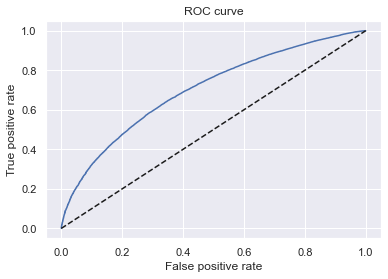

In [130]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

#### Calculating the AuRoC

In [81]:
conf_mat = pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted'])
conf_mat

Predicted,0,1
Actual,,
0,7379,2811
1,35808,47259


In [82]:
accuracy = (conf_mat.iloc[0,0] + conf_mat.iloc[1,1])/df_actual_predicted_probs.shape[0]
accuracy

0.5858863141640842

In [131]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)

In [132]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [133]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.992674,0.000000,0.000000
1,0.992674,0.000000,0.000012
2,0.990747,0.000000,0.000120
3,0.990675,0.000098,0.000120
4,0.989778,0.000098,0.000445


#### Setting the 1st threshold to 1

In [134]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

#### Converting threshold to credit scores

In [135]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [136]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,2059.0
1,0.992674,0.000000,0.000012,794.0
2,0.990747,0.000000,0.000120,776.0
3,0.990675,0.000098,0.000120,776.0
4,0.989778,0.000098,0.000445,768.0


#### Setting the highest threshold to 1

In [137]:
df_cutoffs['Score'][0] = max_score

In [138]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.992674,0.000000,0.000012,794.0
2,0.990747,0.000000,0.000120,776.0
3,0.990675,0.000098,0.000120,776.0
4,0.989778,0.000098,0.000445,768.0


In [139]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
17220,0.481863,0.999607,0.999976,411.0
17221,0.437310,0.999902,0.999976,397.0
17222,0.404807,0.999902,0.999988,387.0
17223,0.381725,1.000000,0.999988,380.0
17224,0.380384,1.000000,1.000000,379.0


#### Function to set value to 1, if proba_hat > p, else zero and then sum it

In [140]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [141]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [142]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.992674,0.000000,0.000012,794.0,1,93256,0.000011,0.999989
2,0.990747,0.000000,0.000120,776.0,10,93247,0.000107,0.999893
3,0.990675,0.000098,0.000120,776.0,11,93246,0.000118,0.999882
4,0.989778,0.000098,0.000445,768.0,38,93219,0.000407,0.999593


In [143]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
17220,0.481863,0.999607,0.999976,411.0,93251,6,0.999936,0.000064
17221,0.437310,0.999902,0.999976,397.0,93254,3,0.999968,0.000032
17222,0.404807,0.999902,0.999988,387.0,93255,2,0.999979,0.000021
17223,0.381725,1.000000,0.999988,380.0,93256,1,0.999989,0.000011
17224,0.380384,1.000000,1.000000,379.0,93257,0,1.000000,0.000000


#### At threshold of 0.9, i.e around 10% probability of default, 51% loan application will be approved.

In [144]:
df_cutoffs.iloc[5000: 6200, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.903276,0.260059,0.549292,589.0,48278,44979,0.517688,0.482312
5001,0.903260,0.260059,0.549364,589.0,48284,44973,0.517752,0.482248
5002,0.903256,0.260157,0.549364,589.0,48285,44972,0.517763,0.482237
5003,0.903247,0.260157,0.549400,589.0,48288,44969,0.517795,0.482205
5004,0.903243,0.260255,0.549400,589.0,48289,44968,0.517806,0.482194
5005,0.903229,0.260255,0.549532,589.0,48300,44957,0.517924,0.482076
5006,0.903226,0.260353,0.549532,589.0,48301,44956,0.517934,0.482066
5007,0.903194,0.260353,0.549749,589.0,48319,44938,0.518127,0.481873
5008,0.903194,0.260451,0.549749,589.0,48320,44937,0.518138,0.481862
5009,0.903180,0.260451,0.549857,588.0,48329,44928,0.518235,0.481765


#### At threshold of 0.95, i.e around 5% probability of default, 21% loan application will be approved.

In [145]:
df_cutoffs.iloc[1000: 2000, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.953240,0.049166,0.206556,649.0,17659,75598,0.189358,0.810642
1001,0.953237,0.049362,0.206556,649.0,17661,75596,0.189380,0.810620
1002,0.953214,0.049362,0.206689,649.0,17672,75585,0.189498,0.810502
1003,0.953214,0.049460,0.206689,649.0,17673,75584,0.189509,0.810491
1004,0.953204,0.049460,0.206773,649.0,17680,75577,0.189584,0.810416
1005,0.953204,0.049558,0.206773,649.0,17681,75576,0.189594,0.810406
1006,0.953202,0.049558,0.206797,649.0,17683,75574,0.189616,0.810384
1007,0.953202,0.049657,0.206797,649.0,17684,75573,0.189627,0.810373
1008,0.953162,0.049657,0.207074,648.0,17707,75550,0.189873,0.810127
1009,0.953160,0.049755,0.207074,648.0,17708,75549,0.189884,0.810116


In [146]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [147]:
df_scorecard.to_csv('df_scorecard.csv')